In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set styles for plots
sns.set(style="whitegrid")

In [2]:

# Load the dataset (update the path if needed)
file_path = '../diabetes_012_health_indicators_BRFSS2021.csv'

try:
    diabetes_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please upload the correct file.")


Dataset loaded successfully.


In [3]:

# Display the first few rows of the dataset
diabetes_data.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [4]:

# Check for missing values in the dataset
missing_values_count = diabetes_data.isnull().sum()
print("Missing values count per column:\n", missing_values_count)


Missing values count per column:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [5]:

# Assuming the target variable is 'Diabetes_012' (modify if needed)
X = diabetes_data.drop(columns=['Diabetes_012'])
y = diabetes_data['Diabetes_012']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

# Train and evaluate multiple models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*50)

# Display accuracy scores
accuracy_scores


Decision Tree Accuracy: 0.7537
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     39508
         1.0       0.04      0.05      0.04      1079
         2.0       0.28      0.31      0.30      6689

    accuracy                           0.75     47276
   macro avg       0.40      0.40      0.40     47276
weighted avg       0.77      0.75      0.76     47276

Confusion Matrix:
 [[33515  1046  4947]
 [  774    52   253]
 [ 4335   287  2067]]
Random Forest Accuracy: 0.8335
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     39508
         1.0       0.02      0.00      0.00      1079
         2.0       0.47      0.19      0.27      6689

    accuracy                           0.83     47276
   macro avg       0.45      0.38      0.39     47276
weighted avg       0.78      0.83      0.80     47276

Confusion Matrix:
 [[38159    38  1311]
 [  976     1   102]
 [ 5433    11  1245]]
Gradient B

c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

{'Decision Tree': 0.7537439715711989,
 'Random Forest': 0.8335096031813182,
 'Gradient Boosting': 0.8421820797021745}

In [7]:
models = {
    
    #'Artificial Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate models
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("="*50)

# Display accuracy scores
accuracy_scores

{}

Dataset loaded successfully.
Missing values count per column:
 Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Decision Tree Accuracy: 0.7710
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     39508
         1.0       0.04      0.04      0.04      1079
         2.0       0.30      0.28      0.29      6689

    accuracy                           0.77     47276
   macro avg       0.40      0.40      0.40     4

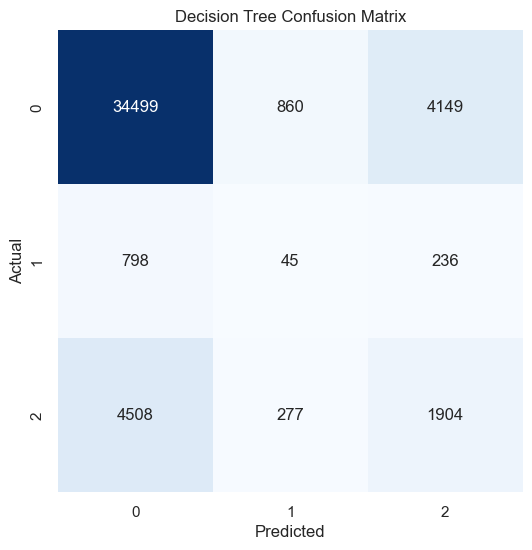

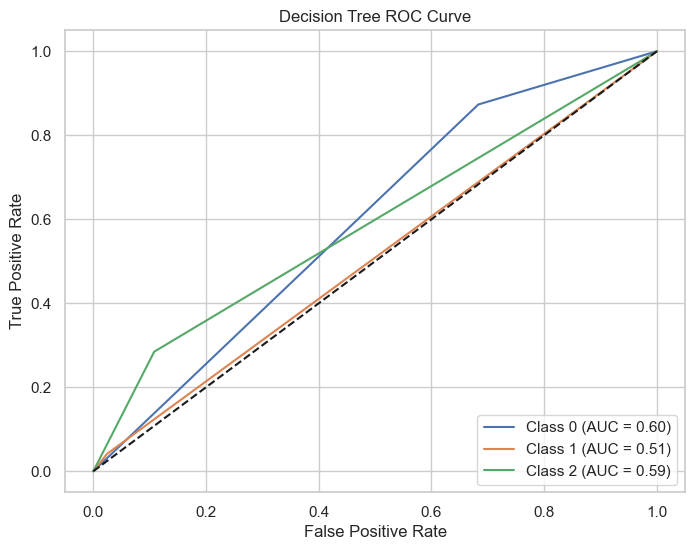

Random Forest Accuracy: 0.8238
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     39508
         1.0       0.04      0.00      0.01      1079
         2.0       0.42      0.22      0.29      6689

    accuracy                           0.82     47276
   macro avg       0.44      0.39      0.40     47276
weighted avg       0.78      0.82      0.79     47276



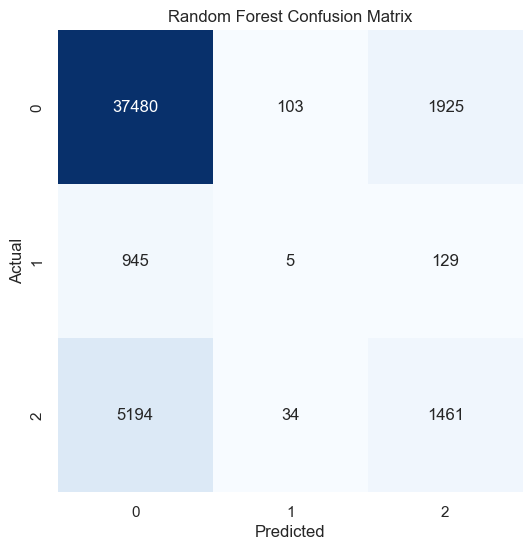

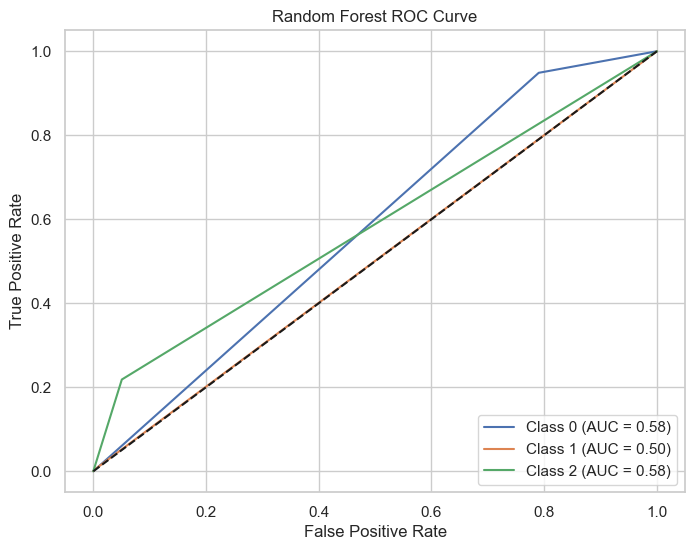

Gradient Boosting Accuracy: 0.8427
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     39508
         1.0       0.00      0.00      0.00      1079
         2.0       0.56      0.17      0.27      6689

    accuracy                           0.84     47276
   macro avg       0.47      0.38      0.39     47276
weighted avg       0.79      0.84      0.80     47276



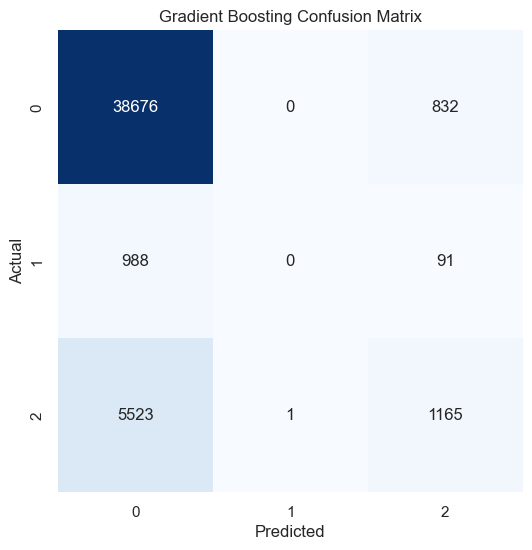

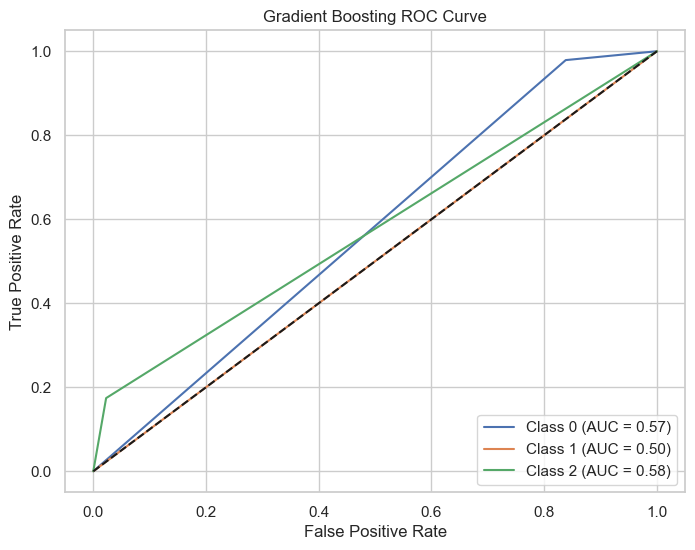

Logistic Regression Accuracy: 0.8405
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     39508
         1.0       0.00      0.00      0.00      1079
         2.0       0.53      0.17      0.26      6689

    accuracy                           0.84     47276
   macro avg       0.46      0.38      0.39     47276
weighted avg       0.79      0.84      0.80     47276



c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.p

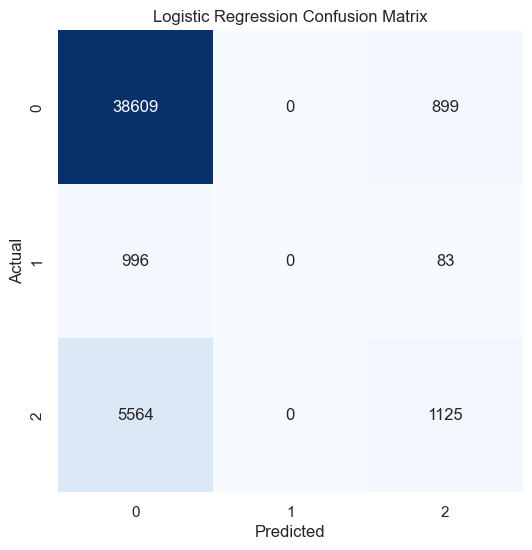

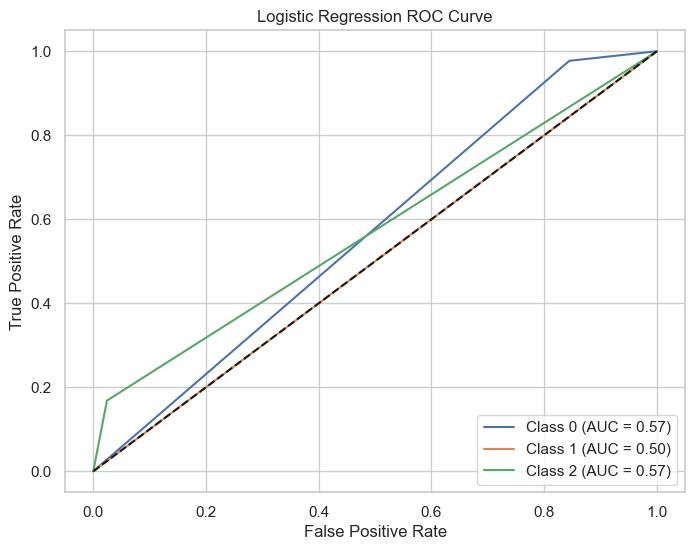

Naive Bayes Accuracy: 0.7582
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85     39508
         1.0       0.05      0.02      0.03      1079
         2.0       0.33      0.57      0.42      6689

    accuracy                           0.76     47276
   macro avg       0.43      0.47      0.44     47276
weighted avg       0.80      0.76      0.77     47276



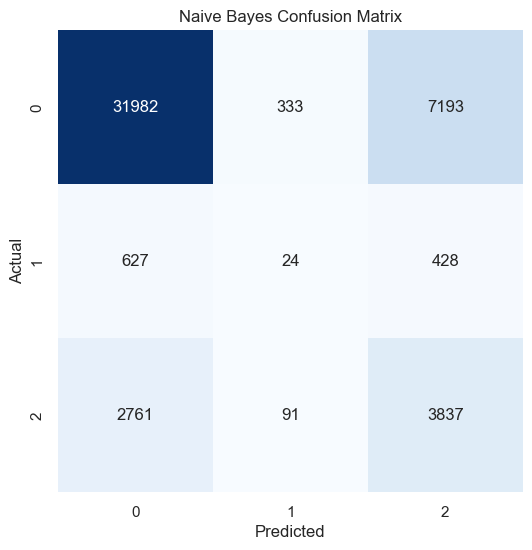

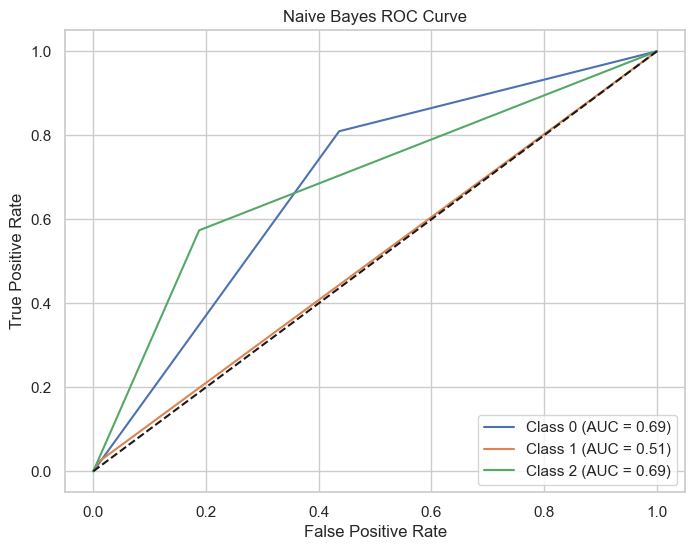

c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8235 - loss: 0.5221 - val_accuracy: 0.8321 - val_loss: 0.4466
Epoch 2/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8354 - loss: 0.4454 - val_accuracy: 0.8395 - val_loss: 0.4333
Epoch 3/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8381 - loss: 0.4352 - val_accuracy: 0.8352 - val_loss: 0.4415
Epoch 4/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8380 - loss: 0.4326 - val_accuracy: 0.8396 - val_loss: 0.4304
Epoch 5/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8390 - loss: 0.4293 - val_accuracy: 0.8401 - val_loss: 0.4288
Epoch 6/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8395 - loss: 0.4286 - val_accuracy: 0.8392 - val_loss: 0.4286
Epoch 7/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8388 - loss: 0.4281 - val_accuracy: 0.8393 - val_loss: 0.4286
Epoch 8/50
4728/4728 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8392 - loss: 0

c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\prane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

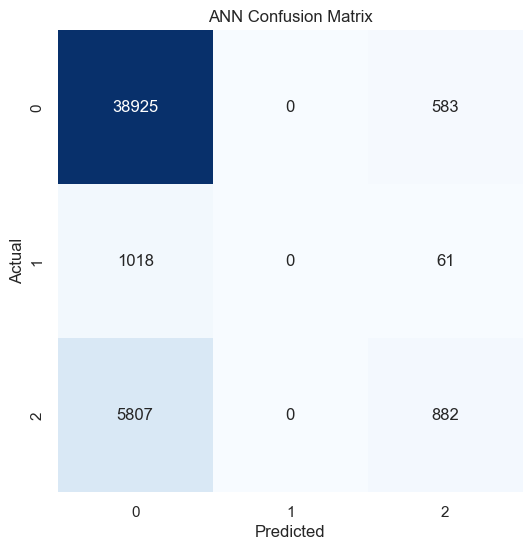

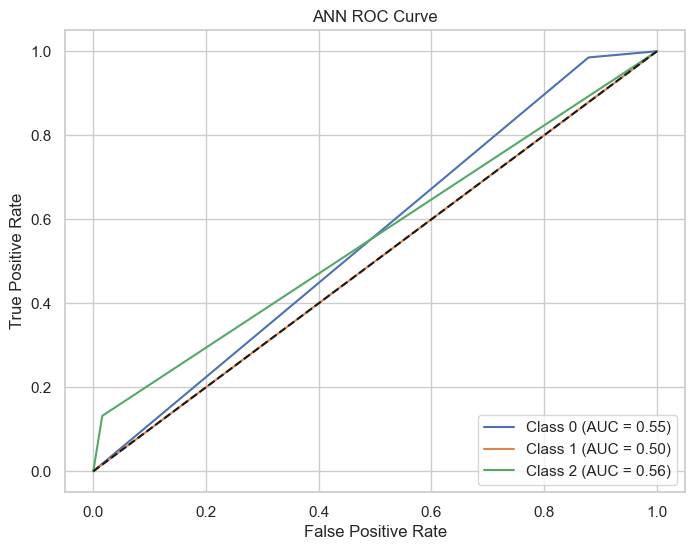

{'Decision Tree': 0.7709620103223623,
 'Random Forest': 0.8238006599543108,
 'Gradient Boosting': 0.8427320416278873,
 'Logistic Regression': 0.8404687367797614,
 'Naive Bayes': 0.7581648193586598,
 'ANN': 0.842012860648109}

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Set styles for plots
sns.set(style="whitegrid")

# Load the dataset (update the path if needed)
file_path = '../diabetes_012_health_indicators_BRFSS2021.csv'

try:
    diabetes_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found. Please upload the correct file.")

# Display the first few rows of the dataset
diabetes_data.head()

# Check for missing values in the dataset
missing_values_count = diabetes_data.isnull().sum()
print("Missing values count per column:\n", missing_values_count)

# Assuming the target variable is 'Diabetes_012' (modify if needed)
X = diabetes_data.drop(columns=['Diabetes_012','Education','Income','DiffWalk'])
y = diabetes_data['Diabetes_012']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate multiple models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    #'Linear SVM': SVC(kernel='linear'),
    'Naive Bayes': GaussianNB(),
}

accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve for multi-class
    y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
    y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8, 6))
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    print("="*50)

# Display accuracy scores
accuracy_scores

# Artificial Neural Network (ANN)
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)

# Evaluate ANN
y_pred_ann = model.predict(X_test)
y_pred_ann = np.argmax(y_pred_ann, axis=1)

accuracy_ann = accuracy_score(y_test, y_pred_ann)
accuracy_scores['ANN'] = accuracy_ann

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(classification_report(y_test, y_pred_ann))

# Confusion Matrix for ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for ANN
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred_ann, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("="*50)

# Display final accuracy scores
accuracy_scores

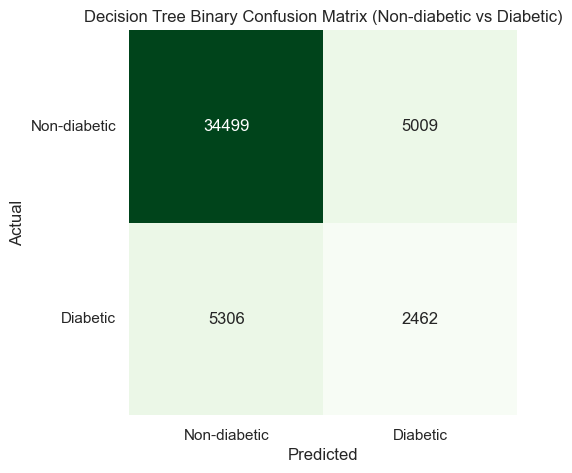

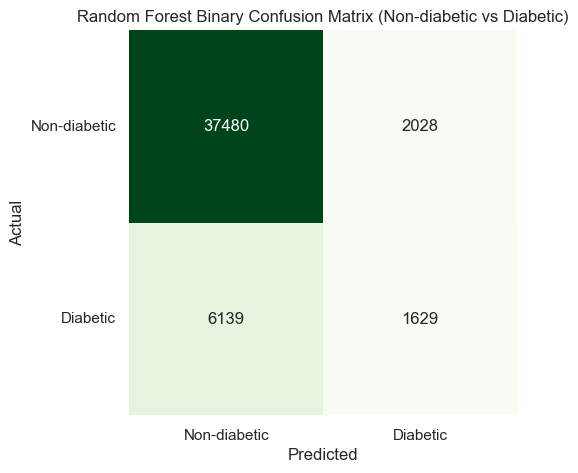

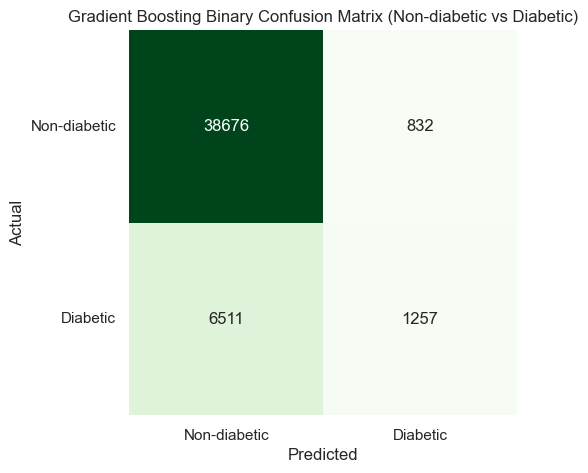

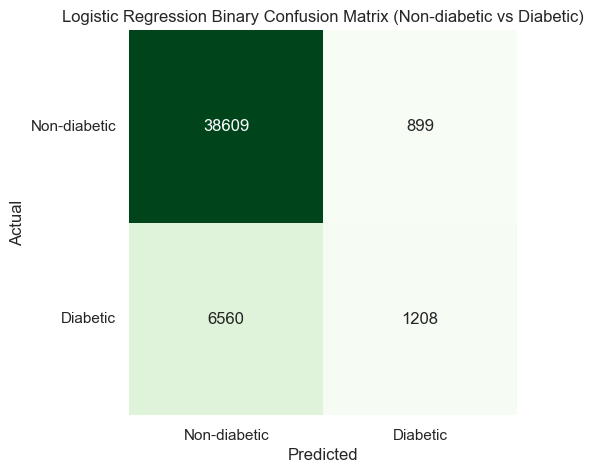

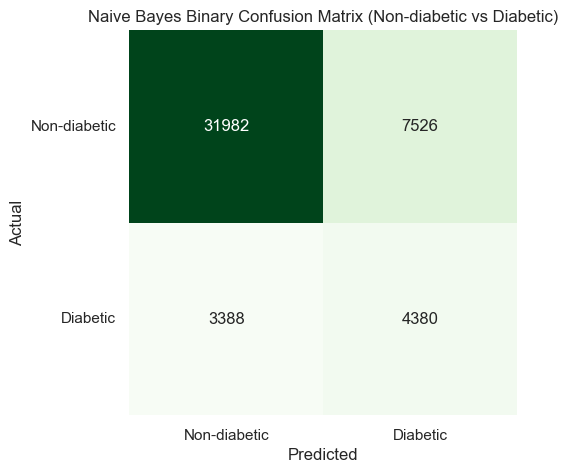

In [9]:
# Combine classes: 0 = Non-diabetic, 1 = Diabetic (merge class 1 and 2 into 1)
y_test_binary = y_test.replace({1: 1, 2: 1})

# Apply this transformation to predictions for each model
# Create a dictionary to store binary confusion matrices
binary_confusion_matrices = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_binary = pd.Series(y_pred).replace({1: 1, 2: 1})
    
    cm_binary = confusion_matrix(y_test_binary, y_pred_binary)
    binary_confusion_matrices[name] = cm_binary
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Greens', cbar=False)
    plt.title(f'{name} Binary Confusion Matrix (Non-diabetic vs Diabetic)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=[0.5, 1.5], labels=['Non-diabetic', 'Diabetic'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Non-diabetic', 'Diabetic'], rotation=0)
    plt.show()


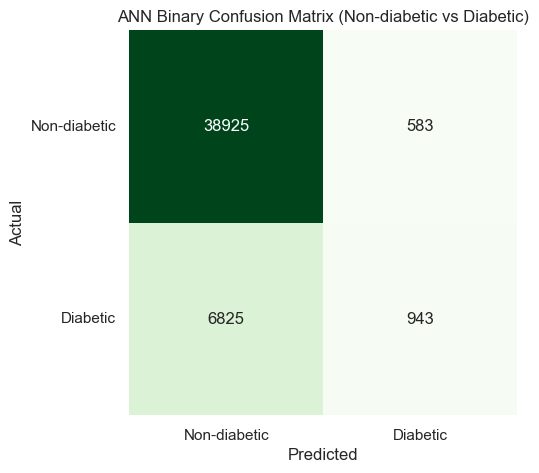

In [10]:
# Combine classes in ANN prediction
y_pred_ann_binary = pd.Series(y_pred_ann).replace({1: 1, 2: 1})
cm_ann_binary = confusion_matrix(y_test_binary, y_pred_ann_binary)

# Plot ANN binary confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm_ann_binary, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('ANN Binary Confusion Matrix (Non-diabetic vs Diabetic)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-diabetic', 'Diabetic'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-diabetic', 'Diabetic'], rotation=0)
plt.show()


In [11]:
import pickle

# Save each traditional ML model in .pkl format
for name, model in models.items():
    filename = f"{name.replace(' ', '_').lower()}_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved successfully as {filename}")

# Save the ANN model in .h5 format



Model saved successfully as decision_tree_model.pkl
Model saved successfully as random_forest_model.pkl
Model saved successfully as gradient_boosting_model.pkl
Model saved successfully as logistic_regression_model.pkl
Model saved successfully as naive_bayes_model.pkl


In [12]:
model.save('ANN_Model.h5')

AttributeError: 'GaussianNB' object has no attribute 'save'